In [ ]:
!nvidia-smi

Fri Jun  4 22:49:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!pip install opacus

     |████████████████████████████████| 102kB 5.4MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# !pip install torch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0

In [ ]:
# !pip uninstall torchvision
# !pip install torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!pip install syft==0.2.9

     |████████████████████████████████| 440kB 8.4MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 9.0MB 9.9MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 450kB 53.2MB/s 
     |████████████████████████████████| 133kB 64.5MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 20.1MB 300kB/s 
     |████████████████████████████████| 4.0MB 39.8MB/s 
     |████████████████████████████████| 1.8MB 40.3MB/s 
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 491kB 62.1MB/s 
     |████████████████████████████████| 204kB 61.8MB/s 
     |████████████████████████████████| 2.0MB 39.9MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |█

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import pandas as pd 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

%load_ext tensorboard
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import random
import time

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset

from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms, utils, datasets
from torchsummary import summary
from torch.autograd import Variable


from tqdm import tqdm


# Check assigned GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

# set manual seed for reproducibility
seed = 42

# general reproducibility
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# gpu training specific
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Mon May 24 15:08:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive

drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
# !pip install numpy

In [ ]:
# !pip install syft==0.2.8

In [ ]:
!gsutil cp -r "/gdrive/My Drive/MNIST3.zip" "../MNIST3.zip"

Copying file:///gdrive/My Drive/MNIST3.zip...
-
Operation completed over 1 objects/27.5 MiB.                                     


In [ ]:
!unzip "../MNIST3.zip" -d "../"

Streaming output truncated to the last 5000 lines.
 extracting: ../MNIST3/test/6/54.png  
 extracting: ../MNIST3/test/6/7074.png  
 extracting: ../MNIST3/test/6/8504.png  
 extracting: ../MNIST3/test/6/3557.png  
 extracting: ../MNIST3/test/6/8374.png  
 extracting: ../MNIST3/test/6/4129.png  
 extracting: ../MNIST3/test/6/1448.png  
  inflating: ../MNIST3/test/6/4148.png  
 extracting: ../MNIST3/test/6/8738.png  
 extracting: ../MNIST3/test/6/4451.png  
 extracting: ../MNIST3/test/6/6920.png  
 extracting: ../MNIST3/test/6/1804.png  
 extracting: ../MNIST3/test/6/6033.png  
 extracting: ../MNIST3/test/6/360.png  
 extracting: ../MNIST3/test/6/3461.png  
 extracting: ../MNIST3/test/6/7279.png  
 extracting: ../MNIST3/test/6/7493.png  
 extracting: ../MNIST3/test/6/3102.png  
 extracting: ../MNIST3/test/6/9016.png  
 extracting: ../MNIST3/test/6/8289.png  
 extracting: ../MNIST3/test/6/317.png  
 extracting: ../MNIST3/test/6/2487.png  
 extracting: ../MNIST3/test/6/4247.png  
 extractin

In [ ]:
!gsutil cp "/gdrive/My Drive/MNIST_train.csv" "../MNIST3_train.csv"
!gsutil cp "/gdrive/My Drive/MNIST_test.csv" "../MNIST3_test.csv"

CommandException: No URLs matched: /gdrive/My Drive/MNIST_train.csv
CommandException: No URLs matched: /gdrive/My Drive/MNIST_test.csv


In [ ]:
!ls "../"

bin	 dev	 lib	MNIST3	    proc  srv		     tools
boot	 etc	 lib32	MNIST3.zip  root  sys		     usr
content  gdrive  lib64	mnt	    run   tensorflow-1.15.2  var
datalab  home	 media	opt	    sbin  tmp


# PREPROCESS

In [ ]:
new_dict = {}

In [ ]:
l = ["Paths", "Labels"]

In [ ]:
new_dict = dict(zip(new_dict, l))
new_dict

{}

In [ ]:
new_dict.update(dict(zip(new_dict, l)))
new_dict

{}

In [ ]:
pathlist = []
label = []

for file in os.listdir("../MNIST3/train/"):
  for n in os.listdir("../MNIST3/train/"+file):
    pathlist.append("../MNIST3/train/"+file+"/"+n)
    label.append(int(file))    

In [ ]:
len(label)

54649

In [ ]:
len(pathlist)

54649

In [ ]:
data = {
   'Paths': [],
   'Labels': []
}
df = pd.DataFrame(data)

df['Paths'] = pathlist
df['Labels'] = label

df.head(5)

,Paths,Labels
0,../MNIST3/train/0/2378.png,0
1,../MNIST3/train/0/52090.png,0
2,../MNIST3/train/0/22264.png,0
3,../MNIST3/train/0/36242.png,0
4,../MNIST3/train/0/53873.png,0


In [ ]:
len(df)

54649

In [ ]:
from google.colab import files

df.to_csv('../gdrive/My Drive/MNIST3_train.csv')
df.to_csv('../MNIST3_train.csv')
#files.download('../gdrive/My Drive/.csv')

In [ ]:
new_dict = {}

In [ ]:
l = ["Paths", "Labels"]

In [ ]:
new_dict = dict(zip(new_dict, l))
new_dict

{}

In [ ]:
new_dict.update(dict(zip(new_dict, l)))
new_dict

{}

In [ ]:
pathlist = []
label = []

for file in os.listdir("../MNIST3/test/"):
  for n in os.listdir("../MNIST3/test/"+file):
    pathlist.append("../MNIST3/test/"+file+"/"+n)
    label.append(int(file))    

In [ ]:
len(label)

9109

In [ ]:
len(pathlist)

9109

In [ ]:
data = {
   'Paths': [],
   'Labels': []
}
df = pd.DataFrame(data)

df['Paths'] = pathlist
df['Labels'] = label

df.head(5)

,Paths,Labels
0,../MNIST3/test/0/532.png,0
1,../MNIST3/test/0/8736.png,0
2,../MNIST3/test/0/6518.png,0
3,../MNIST3/test/0/909.png,0
4,../MNIST3/test/0/284.png,0


In [ ]:
len(df)

9109

In [ ]:
from google.colab import files

df.to_csv('../gdrive/My Drive/MNIST3_test.csv')
df.to_csv('../MNIST3_test.csv')
#files.download('../gdrive/My Drive/.csv')

# START

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Model(nn.Module):
    """Class used to initialize model of student/teacher"""

    def __init__(self):

        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import opacus 
from opacus import PrivacyEngine

class Student:
    """Implementation of Student models
       The student model is trained from the public data labelled by teacher ensembles.
       The teacher ensembles were trained using sensitive data. The student model is further
       used to make predictions on public data.
       Args:
           args[Arguments obj]: Object of arguments class used to control hyperparameters
           model[torch model]: Model of Student 
    """

    def __init__(self, args, model):

        self.args = args
        self.model = model

    def predict(self, data):
        """Function which accepts unlabelled public data and labels it using 
           teacher's model.
           Args:
               model[torch model]: Teachers model
               data [torch tensor]: Public unlabelled data
           Returns:
               dataset[Torch tensor]: Labelled public dataset
        """

        return torch.max(self.model(data), 1)[1]

    def train(self, dataset):
        """Function to train the student model.
           Args:
               dataset[torch dataset]: Dataset using which model is trained.
        """

        for epoch in range(0, self.args.student_epochs):
            self.loop_body(dataset, epoch)

    def loop_body(self, dataset, epoch):
        """Body of the training loop.
           Args:
               dataset: dataset which is used to train the model.
               epoch: Epoch for which the model is being trained.
        """

        optimizer = optim.SGD(self.model.parameters(), lr=self.args.lr, momentum=self.args.momentum)
        iters = 0
        loss = 0.0
        batch_size = sample_size = 32
        
        # if epoch == 1:
        #   privacy_engine = PrivacyEngine(
        #       model,
        #       batch_size = batch_size,
        #       sample_size = sample_size,
        #       alphas=[10, 100],
        #       noise_multiplier= 12,
        #       max_grad_norm = 1.0,
        #       target_delta = 1e-22,
        #   )
        #   privacy_engine.attach(optimizer)

        for (data, target) in dataset:
            optimizer.zero_grad()
            output = self.model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            iters += 1
        # Print loss by making using of log intervals
        print("\n")
        print("EPOCH")
        print(epoch)
        print("\n")
        print("Loss")
        print(loss.item())

    def save_model(self):
        torch.save(self.model.state_dict(), "Models/" + "student_model")

In [ ]:
def split(dataset, batch_size, split=0.2):
    """Splits the given dataset into training/validation.
       Args:
           dataset[torch dataloader]: Dataset which has to be split
           batch_size[int]: Batch size
           split[float]: Indicates ratio of validation samples
       Returns:
           train_set[list]: Training set
           val_set[list]: Validation set
    """

    index = 0
    length = len(dataset)

    train_set = []
    val_set = []

    for data, target in dataset:
        if index <= (length * split):
            train_set.append([data, target])
        else:
            val_set.append([data, target])

        index += 1

    return train_set, val_set


def accuracy(predictions, dataset):
    """Evaluates accuracy for given set of predictions and true labels.
       Args:
           predictions[torch tensor]: predictions made by classifier.
           labels[torch tensor]: true labels of the dataset.
       Returns:
           accuracy[float]: accuracy of classifier.
    """

    total = 0.0
    correct = 0.0

    for j in range(0, len(dataset)):
        correct += (predictions[j].long() == dataset[j].long()).sum().item()
        total += len(dataset[j])

    return (correct / total) * 100


def plot(x, y):
    """Plots a graph of given x and y.
       Args:
           
           x:
           y:
    """
    pass


def histogram(x, y):
    """Plots a histogram for corresponding x and y:
       Args:
           
           x:
           y:
    """

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions.laplace import Laplace
#from util import accuracy
from syft.frameworks.torch.dp import pate

class Teacher:
    """Implementation of teacher models.
       Teacher models are ensemble of models which learns directly disjoint splits of the sensitive data
       The ensemble of teachers are further used to label unlabelled public data on which the student is 
       trained. 
       Args:
           args[Arguments object]: An object of Arguments class with required hyperparameters
           n_teachers[int]: Number of teachers
           epochs[int]: Number of epochs to train each model
    """

    def __init__(self, args, model, n_teachers=1, epsilon=0.5):

        self.n_teachers = n_teachers
        self.model = model
        self.models = {}
        self.args = args
        self.init_models()
        self.epsilon = epsilon

    def init_models(self):
        """Initialize teacher models according to number of required teachers"""

        name = "model_"
        for index in range(0, self.n_teachers):

            model = self.model()
            self.models[name + str(index)] = model

    def addnoise(self, x):
        """Adds Laplacian noise to histogram of counts
           Args:
                counts[torch tensor]: Histogram counts
                epsilon[integer]:Amount of Noise
           Returns:
                counts[torch tensor]: Noisy histogram of counts
        """

        m = Laplace(torch.tensor([0.0]), torch.tensor([1.3 * 1e-2]))
        count = x + m.sample()

        return count

    def split(self, dataset):
        """Function to split the dataset into non-overlapping subsets of the data
           Args:
               dataset[torch tensor]: The dataset in the form of (image,label)
           Returns:
               split: Split of dataset
        """

        ratio = int(len(dataset) / self.n_teachers)
        iters = 0
        index = 0
        split = []
        last_batch = ratio * self.n_teachers

        for teacher in range(0, self.n_teachers):

            split.append([])

        for (data, target) in dataset:
            if (iters) % ratio == 0 and iters != 0:

                index += 1

            split[index].append([data, target])
            iters += 1

            if iters == last_batch:
                return split

        return split

    def train(self, dataset):
        """Function to train all teacher models.
           Args:
                dataset[torch tensor]: Dataset used to train teachers in format (image,label)
        """

        split = self.split(dataset)
        # print(self.args.epochs)
        for epoch in range(1, self.args.epochs + 1):

            index = 0
            for model_name in self.models:

                # print("TRAINING ", model_name)
                # print("EPOCH: ", epoch)
                self.loop_body(split[index], model_name, epoch)
                index += 1

    def loop_body(self, split, model_name, epoch):
        """Body of the training loop.
           Args:
               split: Split of the dataset which the model has to train.
               model_name: Name of the model.
               epoch: Epoch for which the model is being trained.
        """

        model = self.models[model_name]
        optimizer = optim.SGD(model.parameters(), lr=self.args.lr, momentum=self.args.momentum)
        iters = 0
        loss = 0.0
        for (data, target) in split:
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            iters += 1
        # Print loss by making using of log intervals
        # print("Loss")
        # print(loss.item())

    def aggregate(self, model_votes, batch_size):
        """Aggregate model output into a single tensor of votes of all models.
           Args:
                votes: Model output
                n_dataset: Number of datapoints
           Returns:
                counts: Torch tensor with counts across all models    
           """

        counts = torch.zeros([batch_size, 10])
        model_counts = torch.zeros([self.args.n_teachers, batch_size])
        model_index = 0

        for model in model_votes:

            index = 0

            for tensor in model_votes[model]:
                for val in tensor:

                    counts[index][val] += 1
                    model_counts[model_index][index] = val
                    index += 1

            model_index += 1

        return counts, model_counts

    def save_models(self):
        no = 0
        for model in self.models:

            torch.save(self.models[model].state_dict(), "models/" + model)
            no += 1

        print("\n")
        print("MODELS SAVED")
        print("\n")

    def load_models(self):

        path_name = "model_"

        for i in range(0, self.args.n_teachers):

            modelA = self.model()
            self.models[path_name + str(i)] = torch.load("models/" + path_name + str(i))
            self.models[path_name + str(i)] = modelA.load_state_dict()

    def analyze(self, preds, indices, moments=8):

        datadepeps, dataindeps = pate.perform_analysis_torch(
            preds, indices, noise_eps = 1.3 * 1e-2, delta= 1e-5, moments=moments, beta=0.09
        ) # increase noise_eps and fix delta
        return datadepeps, dataindeps

    def predict(self, data):
        """Make predictions using Noisy-max using Laplace mechanism.
           Args:
                data: Data for which predictions are to be made
           Returns:
                predictions: Predictions for the data
        """

        model_predictions = {}

        for model in self.models:

            out = []
            output = self.models[model](data)
            output = output.max(dim=1)[1]
            out.append(output)

            model_predictions[model] = out

        counts, model_counts = self.aggregate(model_predictions, len(data))
        counts = counts.apply_(self.addnoise)

        predictions = []

        for batch in counts:

            predictions.append(torch.tensor(batch.max(dim=0)[1].long()).clone().detach())

        output = {"predictions": predictions, "counts": counts, "model_counts": model_counts}

        return output

In [ ]:
print(torch.__version__)

1.4.0


In [ ]:
!python3 --version

Python 3.7.10


In [ ]:
# !sudo apt upgrade python

In [ ]:
# !sudo apt-get update 

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import os

def load_data(train, batch_size):
    """Helper function used to load the train/test data.
       Args:
           train[boolean]: Indicates whether its train/test data.
           batch_size[int]: Batch size
    """

    dataset_mnist = datasets.MNIST(
            "../data",
            train=train,
            download=True,
            transform=transforms.Compose(
                [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
            ),
        )
    classes, class_counts = np.unique(dataset_mnist.targets, return_counts=True)
    nb_classes = len(classes)
    if train == True:
      # imbal_class_counts = [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 500, 6000]

      # # Get class indices
      # class_indices = [np.where(np.array(dataset_mnist.targets) == i)[0] for i in range(nb_classes)]

      # # Get imbalanced number of instances
      # imbal_class_indices = [class_idx[:class_count] for class_idx, class_count in zip(class_indices, imbal_class_counts)]
      # imbal_class_indices = np.hstack(imbal_class_indices)
      # #print(type(imbal_class_indices))
      # #print(imbal_class_indices[0:2])


      # # Set target and data to dataset
      # dataset_mnist.targets = np.array(dataset_mnist.targets)[imbal_class_indices]
      # dataset_mnist.data = dataset_mnist.data[imbal_class_indices]


      data_dir = '/content/drive/My Drive/MNIST'

      dataset_mnist = []

      for label in os.listdir(data_dir):
        for img in os.listdir(os.path.join(data_dir, label)):
          dataset_mnist.append((img, label))

    loader = torch.utils.data.DataLoader(
        dataset_mnist,
        batch_size=batch_size,
        shuffle=True,
    )

    return loader


class NoisyDataset(Dataset):
    """Dataset with targets predicted by ensemble of teachers.
       Args:
            dataloader (torch dataloader): The original torch dataloader.
            model(torch model): Teacher model to make predictions.
            transform (callable, optional): Optional transform to be applied on a sample.
    """

    def __init__(self, dataloader, predictionfn, transform=None):
        self.dataloader = dataloader
        self.predictionfn = predictionfn
        self.transform = transform
        self.noisy_data = self.process_data()

    def process_data(self):
        """
        Replaces original targets with targets predicted by ensemble of teachers.
        Returns:
            noisy_data[torch tensor]: Dataset with labels predicted by teachers
            
        """

        noisy_data = []

        for data, _ in self.dataloader:
            noisy_data.append([data, torch.tensor(self.predictionfn(data)["predictions"])])

        return noisy_data

    def __len__(self):
        return len(self.dataloader)

    def __getitem__(self, idx):

        sample = self.noisy_data[idx]

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
# # len(test_loader.dataset.data)
# import matplotlib.pyplot as plt

# train_loader = load_data(True, 32)


# for (label, img) in train_loader:
#   print(label)
#   plt.imshow(img)
#   plt.show()

In [ ]:
from PIL import Image

In [ ]:
class CustomDatasetFromCsvData(Dataset):
    def __init__(self, csv_path, transform=None):
        """
        Custom dataset example for reading data from csv
        Args:
            csv_path (string): path to csv file
            height (int): image height
            width (int): image width
            transform: pytorch transforms for transforms and tensor conversion
        """
        self.data = pd.read_csv(csv_path)
        self.paths = self.data['Paths']
        self.labels = np.asarray(self.data['Labels'])
        #self.height = height
        #self.width = width
        self.transform = transform

    def __getitem__(self, index):
        single_image_label = self.labels[index]
        # Read each 784 pixels and reshape the 1D array ([784]) to 2D array ([28,28])
        img_as_np = Image.open(self.paths[index])
        img_as_np = np.reshape(img_as_np, (28,28))
        #img_as_np = np.asarray(self.data.iloc[index][1:]).reshape(28, 28).astype('uint8')
        # Convert image from numpy array to PIL image, mode 'L' is for grayscale
        img_as_img = Image.fromarray(img_as_np)
        #img_as_img = img_as_img.convert('L')
        # Transform image to tensor
        if self.transform is not None:
            img_as_tensor = self.transform(img_as_img)
        #img_as_tensor = Variable(img_as_tensor)
        #single_image_label = Variable(torch.Tensor(single_image_label))
        # Return image and the label
        return (img_as_tensor, single_image_label)

    def __len__(self):
        return len(self.data.index)

In [ ]:
#train_loader = DataLoader(CustomDataset('../gdrive/My Drive/MNIST/'), batch_size=32, shuffle=True)

transformations_train = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

transformations_test = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

mnist_train_data = CustomDatasetFromCsvData('../MNIST3_train.csv', transformations_train)

In [ ]:
mnist_test_data = CustomDatasetFromCsvData('../MNIST3_test.csv', transformations_test)

In [ ]:
# Required imports
import torch
#from Teacher import Teacher
#from Model import Model
#from data import load_data, NoisyDataset
#from util import accuracy, split
#from Student import Student
import syft as sy
from syft.frameworks.torch.dp import pate
from sklearn.metrics import confusion_matrix


class Arguments:

    # Class used to set hyperparameters for the whole PATE implementation
    def __init__(self):

        self.batchsize = 32
        self.test_batchsize = 10
        self.epochs = 50
        self.student_epochs = 30
        self.lr = 0.01
        self.momentum = 0.5
        self.no_cuda = False
        self.seed = 1
        self.log_interval = 30
        self.n_teachers = 50
        self.save_model = False


args = Arguments()

class_accuracies = []
#train_loader = load_data(True, args.batchsize)
#test_loader = load_data(False, args.test_batchsize)

for i in range(5):
  train_loader = torch.utils.data.DataLoader(dataset=mnist_train_data, batch_size=args.batchsize, shuffle=True, drop_last = True)
  test_loader = torch.utils.data.DataLoader(dataset=mnist_test_data, batch_size=args.test_batchsize, shuffle=True, drop_last = True)


  # Declare and train teachers on MNIST training data
  teacher = Teacher(args, Model, n_teachers=args.n_teachers)
  teacher.train(train_loader)

  # Evaluate Teacher accuracy
  teacher_targets = []
  predict = []

  counts = []
  original_targets = []

  print(f'Iteration {i}\n\n')
  for data, target in test_loader:

      output = teacher.predict(data)

      arr_target = []
      teacher_targets.append(target)
      original_targets.append(target)
      predict.append(output["predictions"])
      counts.append(output["model_counts"])
      print("Accuracy: ", accuracy(torch.tensor(predict), teacher_targets))

  print("Accuracy: ", accuracy(torch.tensor(predict), teacher_targets))

  print("\n")
  print("\n")

  print("Training Student")

  print("\n")
  print("\n")

  # Split the test data further into training and validation data for student
  train, val = split(test_loader, args.batchsize)

  student = Student(args, Model())
  N = NoisyDataset(train, teacher.predict)
  student.train(N)

  results = []
  targets = []

  total = 0.0
  correct = 0.0

  for data, target in val:

      predict_lol1 = student.predict(data)
      correct += float((predict_lol1 == (target)).sum().item())
      total += float(target.size(0))

  print("Private Baseline: ", (correct / total) * 100)

  counts_lol = torch.stack(counts).contiguous()
  # print(counts_lol.shape)
  counts_lol = counts_lol.view(50, 9100)
  predict_lol = torch.tensor(predict).view(9100)

  data_dep_eps, data_ind_eps = teacher.analyze(counts_lol, predict_lol, moments= 20)
  print(f"Dependent Epsilon: {data_dep_eps}\nIndependent Epsilon: {data_ind_eps}")

  targets_1 = []
  predict_1 = []

  for data, target in val:
    predict_1.append(student.predict(data))
    targets_1.append(target)

  ### Class-Wise Accuracy of the predictions on the base model


  conf_mat=confusion_matrix(np.concatenate(targets_1), np.concatenate(predict_1))
  print(conf_mat)
  class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
  print(class_accuracy)
  class_accuracies.append(class_accuracy)

Iteration 0


Accuracy:  90.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Streaming output truncated to the last 5000 lines.
Accuracy:  96.58783783783784
Accuracy:  96.59167604049493
Accuracy:  96.59550561797752
Accuracy:  96.5993265993266
Accuracy:  96.6031390134529
Accuracy:  96.60694288913774
Accuracy:  96.61073825503355
Accuracy:  96.6145251396648
Accuracy:  96.60714285714286
Accuracy:  96.61092530657747
Accuracy:  96.61469933184856
Accuracy:  96.61846496106786
Accuracy:  96.62222222222222
Accuracy:  96.62597114317425
Accuracy:  96.62971175166297
Accuracy:  96.62236987818383
Accuracy:  96.61504424778761
Accuracy:  96.61878453038673
Accuracy:  96.61147902869757
Accuracy:  96.61521499448732
Accuracy:  96.61894273127754
Accuracy:  96.61166116611662
Accuracy:  96.61538461538461
Accuracy:  96.61538461538461




Training Student






EPOCH
0


Loss
0.3110092282295227


EPOCH
1


Loss
0.09623227268457413


EPOCH
2


Loss
0.11365874856710434


EPOCH
3


Loss
0.06766904145479202


EPOCH
4


Loss
0.05833161994814873


EPOCH
5


Loss
0.025759026408195496


EPOCH
6

In [ ]:
# # Evaluate Teacher accuracy
# teacher_targets = []
# predict = []

# counts = []
# original_targets = []

# test_loader = torch.utils.data.DataLoader(dataset=mnist_test_data, batch_size=args.test_batchsize, shuffle=True, drop_last = True)

# for data, target in test_loader:

#     output = teacher.predict(data)

#     arr_target = []
#     teacher_targets.append(target)
#     original_targets.append(target)
#     predict.append(output["predictions"])
#     counts.append(output["model_counts"])
#     print("Accuracy: ", accuracy(torch.tensor(predict), teacher_targets))

# print("Accuracy: ", accuracy(torch.tensor(predict), teacher_targets))

# print("\n")
# print("\n")

# print("Training Student")

# print("\n")
# print("\n")

# # Split the test data further into training and validation data for student
# train, val = split(test_loader, args.batchsize)

# student = Student(args, Model())
# N = NoisyDataset(train, teacher.predict)
# student.train(N)

# results = []
# targets = []

# total = 0.0
# correct = 0.0

# for data, target in val:

#     predict_lol1 = student.predict(data)
#     correct += float((predict_lol1 == (target)).sum().item())
#     total += float(target.size(0))

# print("Private Baseline: ", (correct / total) * 100)

In [ ]:
# counts_lol = torch.stack(counts).contiguous()
# # print(counts_lol.shape)
# counts_lol = counts_lol.view(50, 9100)
# predict_lol = torch.tensor(predict).view(9100)

# data_dep_eps, data_ind_eps = teacher.analyze(counts_lol, predict_lol, moments= 20)
# print(f"Dependent Epsilon: {data_dep_eps}\nIndependent Epsilon: {data_ind_eps}")

In [ ]:
# # Evaluate Teacher accuracy
# teacher_targets = []
# predict = []

# counts = []
# original_targets = []


# for data, target in test_loader:

#     output = teacher.predict(data)

#     arr_target = []
#     teacher_targets.append(target)
#     original_targets.append(target)
#     predict.append(output["predictions"])
#     counts.append(output["model_counts"])
#     print("Accuracy: ", accuracy(torch.tensor(predict), teacher_targets))

In [ ]:
# # Split the test data further into training and validation data for student
# train, val = split(test_loader, args.batchsize)

# student = Student(args, Model())
# N = NoisyDataset(train, teacher.predict)
# student.train(N)

# results = []
# targets = []

# total = 0.0
# correct = 0.0

# for data, target in val:

#     predict_lol1 = student.predict(data)
#     correct += float((predict_lol1 == (target)).sum().item())
#     total += float(target.size(0))

# print("Private Baseline: ", (correct / total) * 100)

# counts_lol = torch.stack(counts).contiguous().view(50, 9100)
# predict_lol = torch.tensor(predict).view(9100)

# data_dep_eps, data_ind_eps = teacher.analyze(counts_lol, predict_lol, moments= 20)
# print(f"Dependent Epsilon: {data_dep_eps}\nIndependent Epsilon: {data_ind_eps}")

In [ ]:
counts_lol.shape

torch.Size([50, 9100])

In [ ]:
predict_lol.shape

torch.Size([9100])

In [ ]:
# targets_1 = []
# predict_1 = []

# for data, target in val:
#   predict_1.append(student.predict(data))
#   targets_1.append(target)

In [ ]:
# ### Class-Wise Accuracy of the predictions on the base model

# from sklearn.metrics import confusion_matrix

# conf_mat=confusion_matrix(np.concatenate(targets_1), np.concatenate(predict_1))
# print(conf_mat)
# class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
# print(class_accuracy)

In [ ]:
for acc in class_accuracies:
  print(acc)

[97.8343949  98.65921788 94.39809297 96.97732997 94.75703325 94.51476793
 97.55784062 94.47174447 57.8125     93.56435644]
[98.97959184 98.676957   94.55445545 95.34591195 94.45145019 94.41340782
 96.2190352  91.66666667 48.52941176 94.52736318]
[98.84318766 98.88888889 95.43817527 96.0199005  95.83875163 93.69627507
 95.4308094  94.04052443 58.46153846 94.25427873]
[98.08917197 99.11406423 94.25427873 95.4491018  95.94423321 95.2045134
 95.46044099 93.43246592 66.10169492 93.82871537]
[97.96437659 99.11406423 95.08599509 95.71078431 95.67430025 95.82753825
 96.95767196 92.85714286 63.49206349 94.47852761]


In [ ]:
class_accuracies = [[97.8343949,  98.65921788, 94.39809297, 96.97732997, 94.75703325, 94.51476793,
 97.55784062, 94.47174447, 57.8125,     93.56435644],
[98.97959184, 98.676957,   94.55445545, 95.34591195, 94.45145019, 94.41340782,
 96.2190352,  91.66666667, 48.52941176, 94.52736318],
[98.84318766, 98.88888889, 95.43817527, 96.0199005,  95.83875163, 93.69627507,
 95.4308094,  94.04052443, 58.46153846, 94.25427873],
[98.08917197, 99.11406423, 94.25427873, 95.4491018 , 95.94423321, 95.2045134,
 95.46044099, 93.43246592, 66.10169492, 93.82871537],
[97.96437659, 99.11406423, 95.08599509, 95.71078431, 95.67430025, 95.82753825,
 96.95767196, 92.85714286, 63.49206349, 94.47852761]]

In [ ]:
import csv

with open("/gdrive/My Drive/class_accuracy.csv", 'a+') as file:
  writer = csv.writer(file)
  for class_acc in class_accuracies:
    writer.writerow(['15', class_acc])

In [ ]:
import pandas as pd
df = pd.read_csv("/gdrive/My Drive/class_accuracy.csv")
df = pd.DataFrame(df)
df

,Epsilon,Accuracy
0,5,[98.31606218 98.92473118 92.36363636 96.363636...
1,5,[98.50560399 98.80043621 93.3915212 95.285359...
2,5,[98.06451613 99.10514541 93.75764994 94.110429...
3,5,[98.82964889 99.22907489 94.81743227 95.707070...
4,5,[98.4516129 98.87640449 95.54216867 94.614443...
5,15,[97.8343949 98.65921788 94.39809297 96.977329...
6,15,[98.97959184 98.676957 94.55445545 95.345911...
7,15,[98.84318766 98.88888889 95.43817527 96.019900...
8,15,[98.08917197 99.11406423 94.25427873 95.449101...
9,15,[97.96437659 99.11406423 95.08599509 95.710784...


In [ ]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

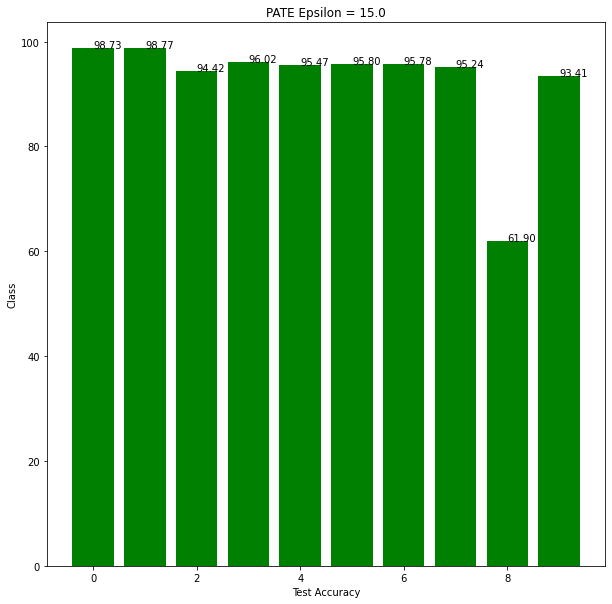

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.xlabel('Test Accuracy')
plt.ylabel('Class')
plt.title('PATE Epsilon = 15.0')
plt.bar(classes, class_accuracy, color='green')

for index, value in enumerate(class_accuracy):
  plt.text(index, value, str(value)[:5])

plt.show()

In [ ]:
### Class-Wise Accuracy of the predictions on the base model

from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(np.concatenate(targets_1), np.concatenate(predict_1))
print(conf_mat)
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)

In [ ]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

plt.bar(classes,class_accuracy, color='green')